# State Health Rankings 2024 Visualization Final

### Introduction

For this project, I used state-level health data from the 2024 United Health Foundation’s Annual Report. After some initial cleaning and reshaping of the data, I selected a focused set of metrics that included overall health scores, economic indicators, access to care, and several health outcomes such as obesity, depression, and diabetes. These indicators were chosen because they provide a well-rounded view of both the health status and the socioeconomic context of each U.S. state.

The main goals of this visualization project were to understand how health outcomes vary across different states, identify possible relationships between economic hardship and public health conditions, and highlight states that might be under-resourced. Specifically, I was looking for patterns that could help explain disparities in health and funding, and explore different ways to visualize the data to provide to shareholders a visualization of the data.

To meet these goals, I completed several key tasks. For the first task, I compared the overall health scores of all 50 states to see where they rank. Then, I created visualizations to explore how economic hardship is related to health outcomes, like obesity. Finally, I worked to identify states that not only have poor health outcomes, but also receive less public health funding, which could make them especially vulnerable to lower rankings.

#### Data
**The csv data was downloaded from [America's Health Rankings 2024](https://www.americashealthrankings.org/learn/reports/2024-annual-report).**
The data had 1,315 data columns, further grouping the main categories I used by male/female, race, and age for each of the 50 states. The PDF report breaks down on individuals pages the findings of each state with plenty of links where the data was retrieved. I, for one, believed my beloved state of Texas would have made the top half prior to creating the visuals or that John Denver spoke heavenly about West Virginia for a reason. And then I, personally, wanted to visualize more.

Full source code:

In [10]:
import sys
import pandas as pd
from IPython.display import display

data = pd.read_csv(
    "2024-annual-report-report-data-all-states.csv",
    encoding="windows-1252",
    low_memory=False
)

reshaped = data.pivot_table(
    index='State',
    columns='Measure',
    values='Value'
).reset_index()

reshaped.columns.name = None 

for col in reshaped.columns:
    if col != 'State':
        reshaped[col] = pd.to_numeric(reshaped[col], errors='coerce')


def running_in_voila():
    return any("voila" in arg.lower() for arg in sys.argv)

if not running_in_voila():
    display(reshaped.head())

,State,Adverse Childhood Experiences,Adverse Childhood Experiences - American Indian/Alaska Native,Adverse Childhood Experiences - Asian,Adverse Childhood Experiences - Black,Adverse Childhood Experiences - Caregiver College Grad,Adverse Childhood Experiences - Caregiver High School Grad/GED,Adverse Childhood Experiences - Caregiver Less Than High School,Adverse Childhood Experiences - Caregiver Some Post-High School,Adverse Childhood Experiences - Female,...,Uninsured - Less Than High School,Uninsured - Multiracial,Uninsured - Native Hawaiian/Other Pacific Islander,Uninsured - Other Race,Uninsured - Some College,Uninsured - White,Volunteerism,Voter Participation (Average),Voter Participation (Midterm),Water Fluoridation
0,AK,20.7,41.4,3.9,NaN,13.8,32.6,NaN,24.5,18.2,...,17.8,11.6,NaN,19.3,9.6,7.3,27.3,59.2,54.6,42.3
1,AL,15.7,NaN,NaN,17.3,10.9,19.1,15.5,22.0,14.6,...,21.5,12.4,NaN,30.9,8.0,6.2,19.5,53.0,45.4,76.6
2,ALL,14.5,32.3,3.7,20.1,10.0,21.1,14.9,20.8,14.8,...,20.7,12.7,11.9,18.8,7.1,5.1,23.2,59.5,52.2,72.3
3,AR,21.3,NaN,4.6,29.1,13.8,25.5,17.2,31.2,24.3,...,20.0,18.5,32.9,22.9,7.7,6.5,20.9,49.0,43.9,86.8
4,AZ,15.7,NaN,4.1,19.7,10.3,20.6,19.1,21.8,16.2,...,22.6,15.6,19.6,18.3,7.8,5.6,23.5,63.9,55.8,57.5


In [11]:
import sys
from IPython.display import display
cols_to_keep = ["State", "Overall", "Total Population", "Social and Economic Factors", "Homicide", "Public Health Funding", "Economic Hardship Index", "Per Capita Income", "Poverty", "Unemployment", "High School Graduation", "Physical Environment", "Air Pollution", "Housing Cost Burden", "Avoided Care Due to Cost", "Uninsured", "Exercise", "Cannabis Use", "Suicide", "Cancer", "Depression", "Diabetes", "High Blood Pressure", "High Cholesterol",  "Obesity", ]
selected = reshaped[cols_to_keep]
selected = selected[selected["State"].str.upper() != "ALL"]
selected = selected[selected["State"] != "DC"]
def running_in_voila():
    return any("voila" in arg.lower() for arg in sys.argv)

if not running_in_voila():
    display(selected.head())

,State,Overall,Total Population,Social and Economic Factors,Homicide,Public Health Funding,Economic Hardship Index,Per Capita Income,Poverty,Unemployment,...,Uninsured,Exercise,Cannabis Use,Suicide,Cancer,Depression,Diabetes,High Blood Pressure,High Cholesterol,Obesity
0,AK,-0.176,733406.0,0.042,8.5,334.0,47.0,45792.0,10.4,4.8,...,10.4,33.9,20.0,27.3,7.3,19.5,8.7,33.8,34.2,35.2
1,AL,-0.599,5108468.0,-0.542,14.4,137.0,74.0,35046.0,16.0,4.0,...,8.5,25.0,17.7,16.6,8.4,22.5,15.7,44.7,42.3,39.2
3,AR,-0.770,3067732.0,-0.971,11.2,128.0,82.0,33012.0,16.3,4.2,...,8.9,26.8,24.4,18.0,8.4,24.2,14.5,42.5,40.2,40.0
4,AZ,-0.060,7431344.0,0.053,8.1,84.0,70.0,41290.0,12.6,4.3,...,9.9,33.3,28.8,21.8,9.4,18.0,11.4,33.4,38.7,31.9
5,CA,0.052,38965193.0,-0.167,6.1,173.0,84.0,48013.0,12.0,5.5,...,6.4,30.1,19.3,11.0,6.5,17.0,11.5,30.6,37.0,27.7


In [14]:
import sys

def running_in_voila():
    return any("voila" in arg.lower() for arg in sys.argv)

if not running_in_voila():
    print(selected.shape)
    print(selected["State"].unique())


(50, 25)
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


## Task 1a: Compare Overall Health Scores Across States and Regions
**Why?** To identify which states are performing well or poorly in terms of overall health scores.
**How?** By creating a horizontal bar chart that ranks states by their `Overall` health score. A horizontal bar graph was chosen to easily distinguish top half and bottom half.
**What?** This task explores variation and ranking among states based on a composite metric (`Overall`).
**Where?** Column: `Overall` Index: `State`
**When?** Performed early in the workflow to get a high-level overview of the dataset before exploring individual health factors.
**Who?** Data analyst or public health researcher using visualization to identify priority regions for deeper analysis or intervention.

**Task 1b: Compare Overall Health Scores Across Regions (last minute bonus visualization for the previous "Who"**


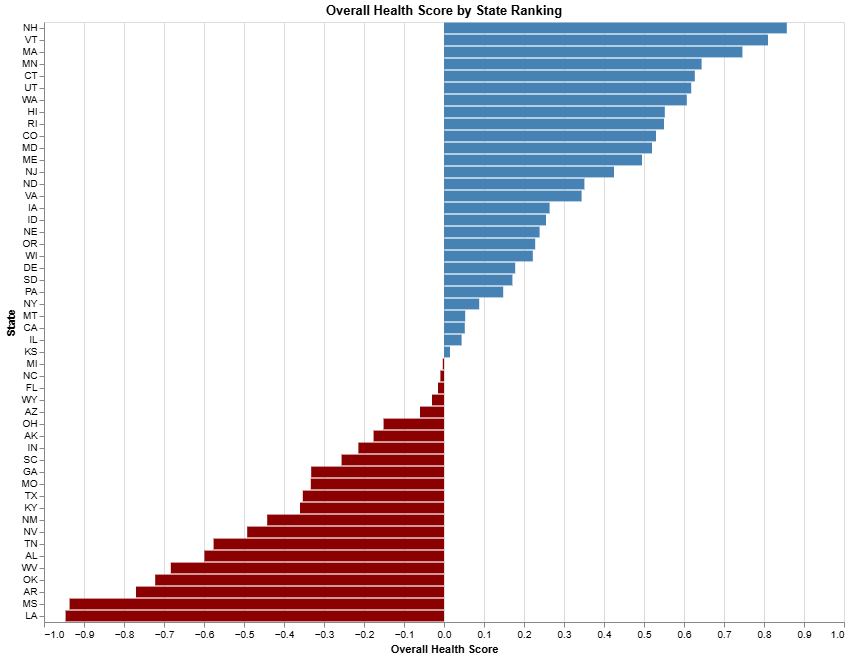

In [67]:
import altair as alt

selected["Overall_Sign"] = selected["Overall"].apply(lambda x: "Positive" if x >= 0 else "Negative")

alt.Chart(selected).mark_bar().encode(
    x=alt.X("Overall:Q", title="Overall Health Score"),
    y=alt.Y("State:N", sort='-x', title="State"),
    color=alt.Color("Overall_Sign:N",
                    scale=alt.Scale(domain=["Positive", "Negative"], range=["steelblue", "darkred"]),
                    legend=None),
    tooltip=[    alt.Tooltip("State:N"),
    alt.Tooltip("Overall:Q"),
    alt.Tooltip("Uninsured:Q", title="Uninsured (%)", format=".1f")
]
).properties(
    width=800,
    height=600,
    title="Overall Health Score by State Ranking"
)


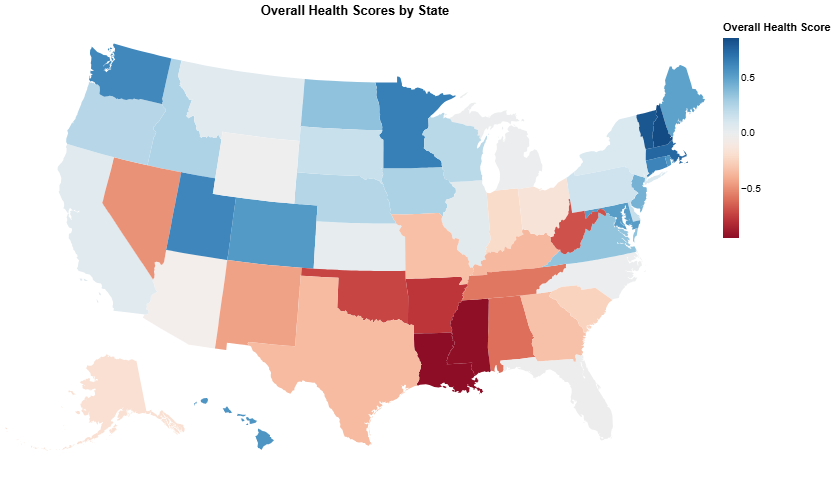

In [68]:
import altair as alt
import pandas as pd
from vega_datasets import data

# Load US states topojson from Vega datasets
states = alt.topo_feature(data.us_10m.url, feature='states')

# Map state abbreviations to FIPS codes (only 50 states, exclude DC and territories)
state_abbrev_to_fips = {
    'AL': 1, 'AK': 2, 'AZ': 4, 'AR': 5, 'CA': 6, 'CO': 8, 'CT': 9, 'DE': 10,
    'FL': 12, 'GA': 13, 'HI': 15, 'ID': 16, 'IL': 17, 'IN': 18,
    'IA': 19, 'KS': 20, 'KY': 21, 'LA': 22, 'ME': 23, 'MD': 24, 'MA': 25,
    'MI': 26, 'MN': 27, 'MS': 28, 'MO': 29, 'MT': 30, 'NE': 31, 'NV': 32,
    'NH': 33, 'NJ': 34, 'NM': 35, 'NY': 36, 'NC': 37, 'ND': 38, 'OH': 39,
    'OK': 40, 'OR': 41, 'PA': 42, 'RI': 44, 'SC': 45, 'SD': 46, 'TN': 47,
    'TX': 48, 'UT': 49, 'VT': 50, 'VA': 51, 'WA': 53, 'WV': 54, 'WI': 55, 'WY': 56
}

# Filter your data to only include these 50 states
df_filtered = selected[selected["State"].isin(state_abbrev_to_fips.keys())].copy()

# Add a column with FIPS code for matching
df_filtered["id"] = df_filtered["State"].map(state_abbrev_to_fips)

# Build the choropleth map chart with turbo color scheme
heatmap = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color(
        "Overall:Q",
        scale=alt.Scale(scheme="redblue"),
        legend=alt.Legend(title="Overall Health Score")
    ),
    tooltip=[
        alt.Tooltip("State:N", title="State"),
        alt.Tooltip("Overall:Q", title="Health Score", format=".1f")
    ]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(df_filtered, key="id", fields=["State", "Overall"])
).project(
    type="albersUsa"
).properties(
    width=700,
    height=450,
    title="Overall Health Scores by State"
)

heatmap


## Task 2: Explore Relationships Between Economic and Health Factors
**Why?** To understand how economic hardship correlates with health outcomes, like obesity, unisured rates, exercise.
**How?** Use a scatter plot comparing `Economic Hardship Index` with `Obesity`, `Unisured`, `High Blood Pressure`, ` High Cholesterol`, `Diabetes`, or `Exercise`.
**What?** This task examines correlation and outliers in two-variable comparisons. The correlation regression line can be checked to visualize any positive or negative correlation. Included is the tooltip to hover and view individual states and scores.
**Where?** Columns: `Econimc Hardship Index`, `Obesity`, `Uninsured`, etc Index: `State`
**When?** Performed after initial exploration to generate hypotheses about cause-and-effect or clustering of outcomes.
**Who?** Policy analyst or public health planner evaluating where socioeconomic policy changes may have the greatest health impacts.

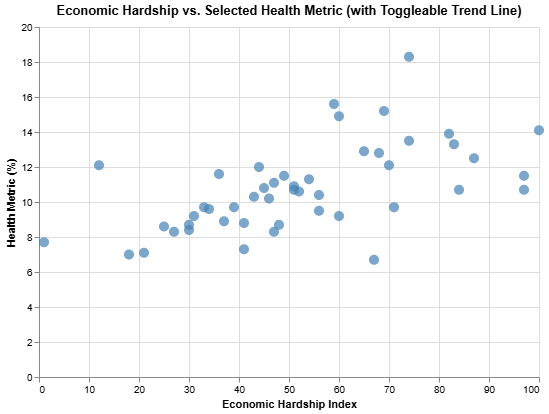

In [74]:
import altair as alt
import pandas as pd

melted = selected.melt(
    id_vars=["State", "Economic Hardship Index"],
    value_vars=[
        "Avoided Care Due to Cost", "Cancer", "Diabetes",  "Exercise", 
        "High Blood Pressure", "High Cholesterol", "Obesity",
        "Uninsured" 
    ],
    var_name="Health Metric",
    value_name="Value"
)

health_metric_param = alt.param(
    name="health_metric",
    bind=alt.binding_select(
        options=[
            "Avoided Care Due to Cost", "Cancer", "Diabetes",  "Exercise", 
            "High Blood Pressure", "High Cholesterol", "Obesity",
            "Uninsured"  
        ],
        name="Health Metric: "
    ),
    value="Avoided Care Due to Cost"
)

show_regression = alt.param(
    name="show_regression",
    bind=alt.binding_checkbox(name="Show Correlation Line"),
    value=False
)

points = alt.Chart(melted).mark_circle(size=100).encode(
    x=alt.X("Economic Hardship Index:Q", title="Economic Hardship Index"),
    y=alt.Y("Value:Q", title="Health Metric (%)"),
    color=alt.value("steelblue"),
    tooltip=[
        alt.Tooltip("State:N"),
        alt.Tooltip("Economic Hardship Index:Q", format=".1f"),
        alt.Tooltip("Value:Q", format=".1f"),
        alt.Tooltip("Health Metric:N")
    ]
).transform_filter(
    alt.datum["Health Metric"] == health_metric_param
)

trendline = alt.Chart(melted).transform_filter(
    (alt.datum["Health Metric"] == health_metric_param) & show_regression
).transform_regression(
    "Economic Hardship Index", "Value", method="linear"
).mark_line(color="darkred", strokeDash=[5, 5]).encode(
    x="Economic Hardship Index:Q",
    y="Value:Q"
)


chart = (points + trendline).add_params(
    health_metric_param,
    show_regression
).properties(
    width=500,
    height=350,
    title="Economic Hardship vs. Selected Health Metric (with Toggleable Trend Line)"
)

chart


## Task 3: Identify States with Health Resource Deficits
**Why?** To find states where poor outcomes are linked with low public health funding or access to care.
**How?** Use a combination of heatscatter plot and filtering to isolate states with low `Public Health Funding` and high `Avoided Care Due to Cost`. All values were normalized on a scale of 0-1, with Public Health Funding and Exercise reversed. This was done so lower value in these categories would be similar to the other lower values in the health metrics. It includes a dropdown to visualize where a state's value falls in a few different health metrics. 
**What?** This task focuses on identifying the thresholds, bottlenecks, and gaps in resource allocation.
**Where?** Columns: `Public Health Funding`, `Avoided Care Due to Cost`, `Uninsured`
**When?** Mid-to-late analysis phases, guiding recommendations or mapping potential interventions.
**Who?** Health equity advocate or nonprofit stategist aiming to prioritize underserved areas.

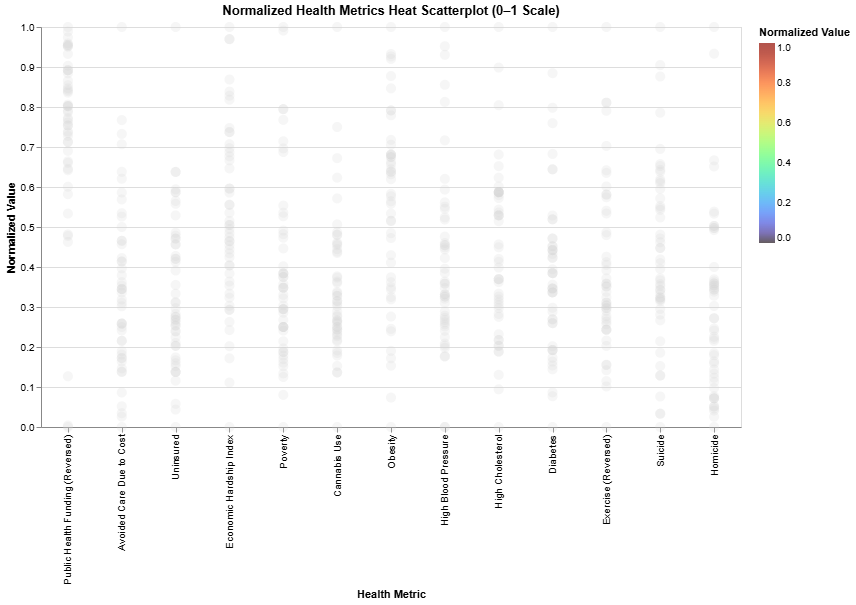

In [73]:
import altair as alt
import pandas as pd

df_norm = selected.copy()

metrics = [
    "Public Health Funding", 
    "Avoided Care Due to Cost",
    "Uninsured",
    "Economic Hardship Index",
    "Poverty",
    "Cannabis Use",
    "Obesity",
    "High Blood Pressure",
    "High Cholesterol",
    "Diabetes",
    "Exercise",
    "Suicide",
    "Homicide"    
]

for metric in metrics:
    min_val = df_norm[metric].min()
    max_val = df_norm[metric].max()
    df_norm[f"{metric} Norm"] = (df_norm[metric] - min_val) / (max_val - min_val)

df_norm["Public Health Funding Norm"] = 1 - df_norm["Public Health Funding Norm"]
df_norm["Exercise Norm"] = 1 - df_norm["Exercise Norm"]


norm_cols = [f"{m} Norm" for m in metrics]
melted = df_norm.melt(
    id_vars=["State"],
    value_vars=norm_cols,
    var_name="Metric",
    value_name="Value"
)

melted["Metric"] = melted["Metric"].str.replace(" Norm", "", regex=False)
melted.loc[melted["Metric"] == "Public Health Funding", "Metric"] = "Public Health Funding (Reversed)"
melted.loc[melted["Metric"] == "Exercise", "Metric"] = "Exercise (Reversed)"


state_options = ["All"] + sorted(df_norm["State"].unique())
state_dropdown = alt.binding_select(options=state_options, name="Select State: ")
state_param = alt.param(name="state_param", bind=state_dropdown, value="All")

base = alt.Chart(melted).mark_circle(size=100, opacity=0.2).encode(
    x=alt.X("Metric:N", title="Health Metric", sort=None),
    y=alt.Y("Value:Q", title="Normalized Value", scale=alt.Scale(domain=[0, 1])),
    color=alt.value("lightgray"),
    tooltip=[
        alt.Tooltip("State:N"),
        alt.Tooltip("Metric:N"),
        alt.Tooltip("Value:Q", format=".2f")
    ]
).transform_filter(
    (state_param == "All") | (alt.datum.State != state_param)
)

highlight = alt.Chart(melted).mark_circle(size=300).encode(
    x=alt.X("Metric:N", title="Health Metric", sort=None),
    y=alt.Y("Value:Q", title="Normalized Value", scale=alt.Scale(domain=[0, 1])),
    color=alt.Color(
        "Value:Q",
        scale=alt.Scale(scheme="turbo", domain=[0, 1]),
        legend=alt.Legend(title="Normalized Value")
    ),
    tooltip=[
        alt.Tooltip("State:N"),
        alt.Tooltip("Metric:N"),
        alt.Tooltip("Value:Q", format=".2f")
    ]
).transform_filter(
    alt.datum.State == state_param
)

heat_scatter = (base + highlight).add_params(
    state_param
).properties(
    width=700,
    height=400,
    title="Normalized Health Metrics Heat Scatterplot (0–1 Scale)"
)

heat_scatter


### Design Summary and Justification
All of the visualizations were created using Altair for interactive features. It allowed me to quickly experiment with design ideas and incorporate interactivity, such as tooltips and dropdown menus, without making the visuals too complex.

Color was used strategically throughout the charts. For example, in the bar chart, color highlights whether a state is performing above or below average. In the scatterplots and heatmaps, color helps to emphasize variation in health metrics. This makes it easier for users to spot trends and outliers at a glance.

The layout of each chart was designed with usability in mind. Horizontal bar charts were used so top half and bottom half would be readable. Scatterplots were included to help viewers visually assess correlations between economic conditions and health outcomes. Heatmaps and dot plots allowed for quick comparisons across multiple dimensions.

Overall, I focused on keeping the design clean and not overwhelming the viewer. Tooltips were added to provide helpful context without adding visual clutter. Sort options and interactivity made the charts more engaging and helped users explore the data in ways that were relevant to their own questions.

### Evaluation Summary
To evaluate the effectiveness of my visualizations, I shared them with three people who had some basic familiarity with data, two mechanical engineer  friends and my mother. Each completed four short questions designed to reflect real analysis scenarios, followed by a brief interview to gather their feedback. I provided them a link to the interactive charts using Google Colab or Jupyter.

**Questions**
1) Which three states are ranked the lowest? 
2) Which area of the United States seems to be considered healthy based on their overall scores?
3) Does Economic Hardship have a positive or negative correlation with Avoided Care due to Cost?
4) From the dropdown menu, are most of Colorado's health markers bad/towards the top or good/near the bottom?

I tracked how long it took them to answer, how confident they were, and then asked a few follow-up questions. The goal was to see how easily they could understand the charts, whether the visuals supported their reasoning, and if anything was confusing or difficult.

The results were mostly positive. All three participants were able to complete the tasks. They said the bar chart and heatmap were the most straightforward to read. The heat scatterplot led to more questions and discussion, which showed it was thought-provoking but slightly harder to interpret.

### Synthesis of Findings

Through this project, I found that several aspects of my design worked well. The use of color and sorting helped people quickly notice important patterns, such as which states were struggling or which had better funding. The interactive tooltips were also appreciated, as they gave people access to more detailed information without making the chart look too busy.

Participants generally found the charts clear and helpful for answering the questions. However, there are also areas I would like to improve. For example, adding filters to allow users to explore by region or specific health topics could make the charts more powerful. Another idea is to combine multiple charts into a single dashboard view, which would make it easier to compare metrics side by side.

Throughout the project, my plan evolved based on what I learned during the process. I initially only planned to make a bar chart and scatterplot, but added a heatmap after realizing it helped address one of my key goals. I also adjusted the tooltips and formatting based on early user feedback to make them clearer. In the evaluation phase, I decided not only to measure accuracy but also ask for people’s confidence and reflections, which gave me more insight into how effective the visuals were.

In summary, this project helped me learn a lot about designing for clarity, interactivity, user needs, and how to adapt a data analysis plan based on what the data and users reveal along the way.